In [10]:
# Modules
#import numpy as np

#from astropy.io import fits
#from astropy.table import Table

import matplotlib
from matplotlib import pyplot as plot

import lightkurve as lk

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'STScI/MAST'         / institution responsible for creating this file 
DATE    = '2020-06-19'         / file creation date.                            
TSTART  =    1683.352104357303 / observation start time in BTJD                 
TSTOP   =    1710.185719802822 / observation stop time in BTJD                  
DATE-OBS= '2019-07-18T20:25:

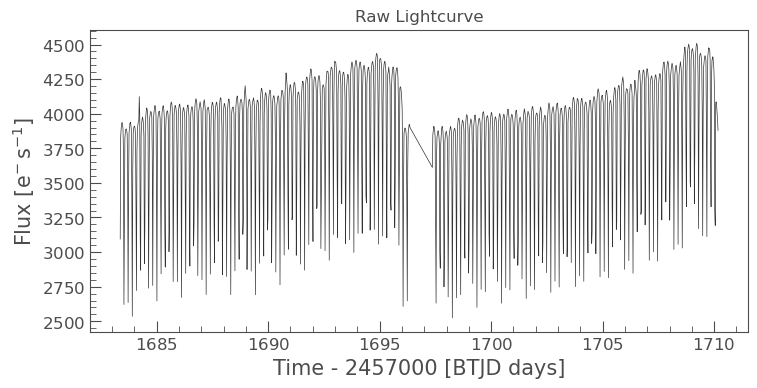

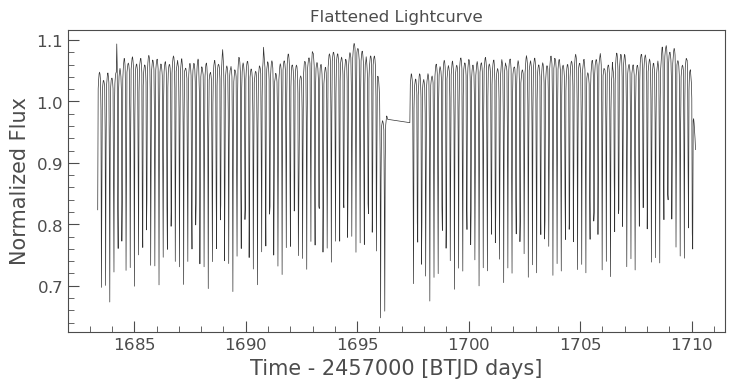

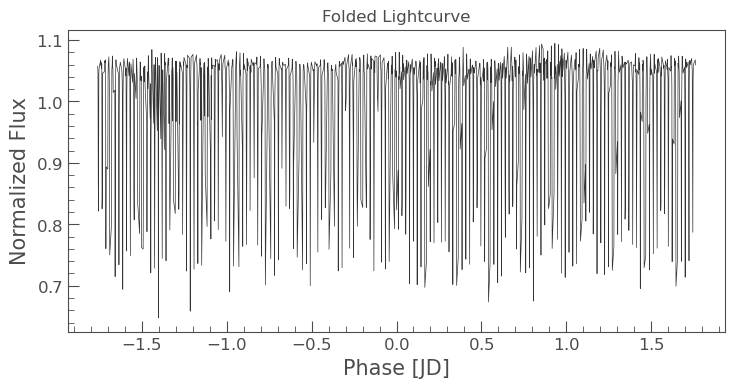

In [36]:
# TESS Data
TIC_ID = "155657581"# "441420236" # 155657581
#tpf = lk.search_targetpixelfile("TIC " + str(TIC_ID), mission="TESS")[0].download() # Use TIC ID
tpf = lk.search_tesscut(str("TIC " + str(TIC_ID)), sector = 14).download()

lightcurve = tpf.to_lightcurve()
lightcurve.plot()
plot.title("Raw Lightcurve", loc = "center")
flat_lightcurve = lightcurve.flatten(window_length = 401)
flat_lightcurve.plot()
plot.title("Flattened Lightcurve", loc = "center")
folded_lightcurve = flat_lightcurve.fold(period = 3.5225)
folded_lightcurve.plot()
plot.title("Folded Lightcurve", loc = "center")
tpf.get_header()

In [252]:
fits_to_open = "tess-s0043-4-2_83.593860_21.973411_20x10_astrocut.fits"
frame = 1

lcf = lk.TessLightCurveFile(fits_to_open, )
#print(lcf.hdu)
#lcf.plot()
data_as_lightkurve_object = lk.LightCurve(lcf)
print(type(data_as_lightkurve_object))
#print(data_as_lightkurve_object["flux"][0])
#print(type("hello"))
#data_as_lightkurve_object = lk.LightCurve(data={"time": lcf["time"], "flux": lcf["flux"], "flux_err": lcf["flux_err"]})
####lc = data_as_lightkurve_object.to_lightcurve()
#print(data_as_lightkurve_object.hdu[1].data)
#print(data_as_lightkurve_object.meta)
print(data_as_lightkurve_object.meta['MISSION'])
print(data_as_lightkurve_object.time)
#print(data_as_lightkurve_object.flux)
#print(data_as_lightkurve_object.flux_err)
#print(data_as_lightkurve_object.quality)
print(data_as_lightkurve_object.sector)

lightcurve = data_as_lightkurve_object["flux"]
lightcurve.quality

data_as_lightkurve_object.to_lightcurve()
####print(data_as_lightkurve_object.centroid_col) # doesn't work
####print(data_as_lightkurve_object.centroid_row) # doesn't work
####print(data_as_lightkurve_object.estimate_cdpp()) # doesn't work
#plot.plot(data_as_lightkurve_object.to_lightcurve())
#data_as_lightkurve_object.plot()

pixel_file = lk.search_targetpixelfile("Trappist-1")[0].download()
print("here " + str(pixel_file.to_lightcurve().centroid_col)) # doesn't work

'''x = data_as_lightkurve_object.time
y = []
for max_brightness_rows in range(len(data_as_lightkurve_object.time)):
    print(data_as_lightkurve_object.hdu[1].data[max_brightness_rows]["flux"])
    column_max = []
    for max_brightness_cols in range(len(data_as_lightkurve_object.hdu[1].data[max_brightness_rows]["flux"][0]) - 1):
        print(max_brightness_cols)
        print(data_as_lightkurve_object.hdu[1].data[max_brightness_rows]["flux"][max_brightness_cols])
        column_max.append(max(data_as_lightkurve_object.hdu[1].data[max_brightness_rows]["flux"][max_brightness_cols]))
    y.append(max(column_max))

plot.plot(x, y)'''


flat_lc = data_as_lightkurve_object.flatten(window_length=401)
flat_lc.plot()

print(break_here)

'''from astropy.utils.data import get_pkg_data_filename
#filename = get_pkg_data_filename('timeseries/kplr010666592-2009131110544_slc.fits')
file = fits.open(fits_to_open)#get_pkg_data_filename(fits_to_open)
from astropy.timeseries import TimeSeries

flux = np.array(file[1].data[frame]["flux"])
flux_err = np.array(file[1].data[frame]["flux_err"])
time = np.array(file[1].data[frame]["time"])

#table = Table([flux, flux_err, np.arange(0, 10)], names = ["Flux", "Flux_Err", "Time"])
#plot.plot(table)


(print(table)
ts = TimeSeries.read(filename, format="tess.fits")#'kepler.fits')
#file = fits.open(fits_to_open)
#ts = TimeSeries.read(file[1], format='kepler.fits')
print(ts)
plot.plot(ts.time.jd, ts['sap_flux'], 'k.', markersize=1)
plot.xlabel('Julian Date')
plot.ylabel('SAP Flux (e-/s)')'''



'''
#tpf_file = fits_to_open.download(quality_bitmask='default')
#tpf_file.plot()

#print(break_here)

file = fits.open(fits_to_open)
print(file)
#print(file[1].data[0]["flux"]) # Data[] is what image in the gif is being accessed

flux = np.array(file[1].data[frame]["flux"])
print(flux.shape)
flux_err = np.array(file[1].data[frame]["flux_err"])
time = np.array(file[1].data[frame]["time"])
#print(np.array(file[1].data[frame].array.names)) # Key names: ['TIME' 'TIMECORR' 'CADENCENO' 'RAW_CNTS' 'FLUX' 'FLUX_ERR' 'FLUX_BKG' 'FLUX_BKG_ERR' 'QUALITY' 'POS_CORR1' 'POS_CORR2' 'FFI_FILE']
#print(np.array(file[1].data[frame]["TIMECORR"]))

plot.imshow(flux)
plot.colorbar()

# make a lightcurve
x = np.arange(0, len(flux[0]), 1)
##print(x)
#y = data.flatten()
#y = data[0]
y = Table(data[0].data)
##print(y)
plot.plot(x, y)'''

'''data_as_dictionary = {}
for key in np.array(file[1].data[frame].array.names):
    data_as_dictionary[key] = file[1].data[frame][key]

print(data_as_dictionary)
data_as_lightkurve_object = lk.LightCurve(data_as_dictionary)#(dict(file[1].data[frame]))
###data_as_lightkurve_object = lk.LightCurve(data={"time": np.arange(0, 10), "flux": flux, "flux_err": flux_err})
print(data_as_lightkurve_object)
###data_as_lightkurve_object = lk.LightCurve(data={"flux": flux, "time": time, "flux": flux})
lc = data_as_lightkurve_object.to_lightcurve(aperture_mask="pipeline")
lc.plot()'''


# learn how to download ground work manually
# get things to download automatically
# create apature of thw hole star and add them up to get total star brightness and half to get whole star and track its movment
# Like if there is a cloud and all the stars are fainter

<class 'lightkurve.lightcurve.LightCurve'>
TESS
[2474.17043249 2474.17737764 2474.18432279 ... 2498.87414926 2498.88109427
 2498.88803929]
43


AttributeError: 'Quantity' object has no 'quality' member

In [61]:
#lk_file = lk.search_targetpixelfile("Trappist-1")[0].download()

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 3 3 1 1 1]
 [1 1 1 1 3 3 3 1 1 1]
 [1 1 1 1 1 3 3 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]]


AttributeError: module 'matplotlib.pyplot' has no attribute 'get_array'

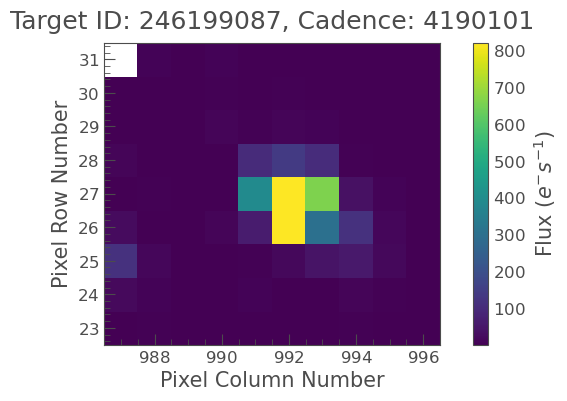

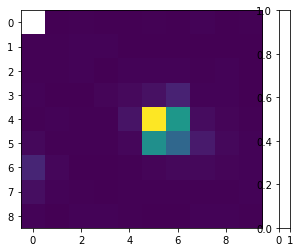

In [128]:
'''#print(lk_file.get_header()) #.get("HEADER VALUE")
lk_file.plot(frame = 87371) # Plotting a single part of the gif
#print(lk_file.hdu)
print(lk_file.hdu[2].data)
#print(lk_file.flux[0])
figure, ax = plot.subplots(1)
#ax.imshow(lk_file.hdu[2].data, cmap = "viridis")
array = np.array(lk_file.flux[0].data)
ax.imshow(np.flipud(array), cmap = "viridis") #98026
figure.colorbar(plot, orientation='vertical')
plot.show()'''